<a href="https://colab.research.google.com/github/alurabhinava/IITM_BS_in_DataScience/blob/MachineLearningPractice/MLP_Week2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(data_url, sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
feature_list = df.columns[:-1].values
label = [df.columns[-1]]
print("Feature list : ", feature_list)
print("Label : ", label)

Feature list :  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label :  ['quality']


In [7]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Text(0.5, 1.0, 'Total Wine Quality')

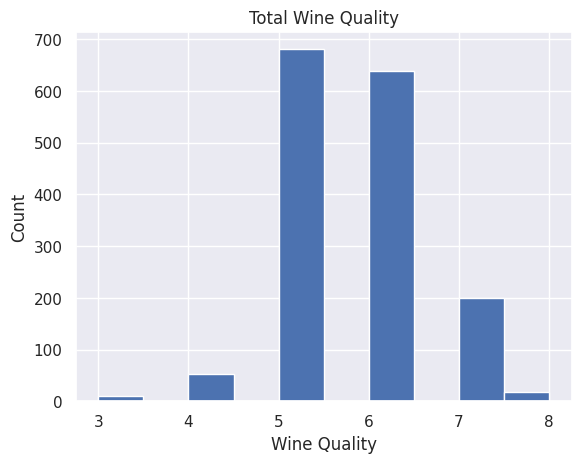

In [8]:
sns.set()
df.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.title('Total Wine Quality')

In [9]:
def split_train_test(data, test_ratio):
  #Set Random Seed
  np.random.seed(42)

  #Shuffle the dataset
  shuffled_indices = np.random.permutation(len(data))

  # Calculate the size of the test set
  test_set_size = int(len(data) * test_ratio)

  #Split dataset to get training and test sets
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(df, 0.2)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['quality']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

### Data Visualization

In [14]:
exploration_set = strat_train_set.copy()

<Axes: xlabel='fixed acidity', ylabel='density'>

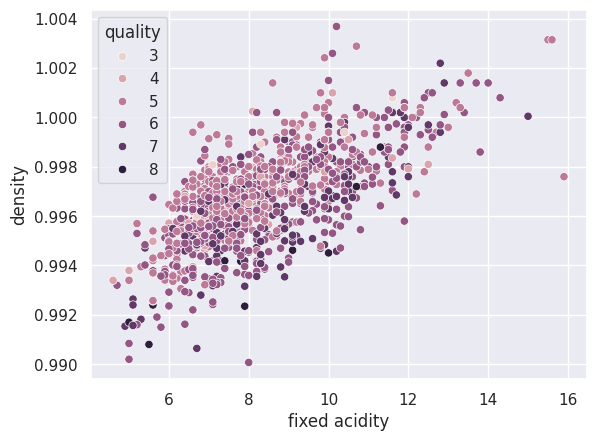

In [15]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality', data=exploration_set)

<Axes: xlabel='fixed acidity', ylabel='density'>

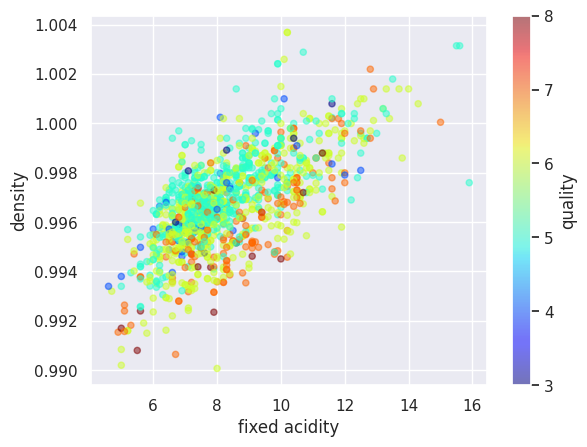

In [16]:
exploration_set.plot(kind='scatter', x='fixed acidity', y='density', alpha=0.5, c='quality', cmap=plt.get_cmap('jet'))

In [17]:
corr_matrix = exploration_set.corr()

In [18]:
corr_matrix['quality']

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

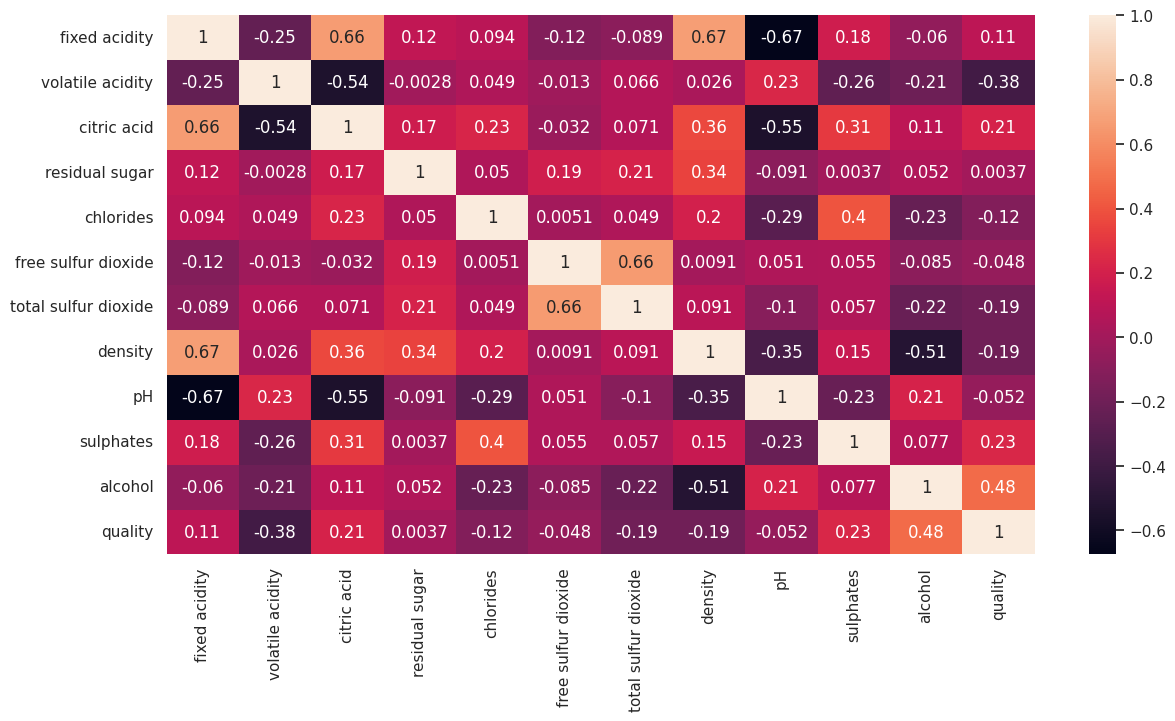

In [19]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

array([[<Axes: xlabel='citric acid', ylabel='citric acid'>,
        <Axes: xlabel='pH', ylabel='citric acid'>,
        <Axes: xlabel='alcohol', ylabel='citric acid'>,
        <Axes: xlabel='sulphates', ylabel='citric acid'>,
        <Axes: xlabel='quality', ylabel='citric acid'>],
       [<Axes: xlabel='citric acid', ylabel='pH'>,
        <Axes: xlabel='pH', ylabel='pH'>,
        <Axes: xlabel='alcohol', ylabel='pH'>,
        <Axes: xlabel='sulphates', ylabel='pH'>,
        <Axes: xlabel='quality', ylabel='pH'>],
       [<Axes: xlabel='citric acid', ylabel='alcohol'>,
        <Axes: xlabel='pH', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='sulphates', ylabel='alcohol'>,
        <Axes: xlabel='quality', ylabel='alcohol'>],
       [<Axes: xlabel='citric acid', ylabel='sulphates'>,
        <Axes: xlabel='pH', ylabel='sulphates'>,
        <Axes: xlabel='alcohol', ylabel='sulphates'>,
        <Axes: xlabel='sulphates', ylabel='sulphates'>,
  

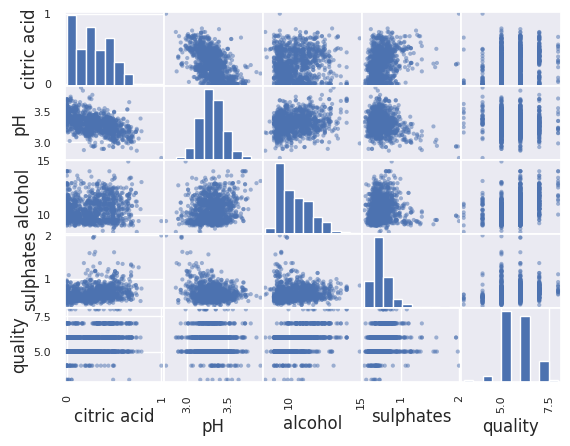

In [21]:
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
scatter_matrix(exploration_set[attribute_list])

### Data Preparation

In [22]:
# Copy all features leaving aside the label
wine_features = strat_train_set.drop("quality", axis=1)

# Copy the label list
wine_labels = strat_train_set['quality'].copy()

In [23]:
# Checks the missing values in each features
wine_features.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [25]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [27]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [28]:
tr_features = imputer.transform(wine_features)

In [29]:
tr_features.shape

(1279, 11)

In [30]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)

In [31]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [32]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()